# Regression With IMBD Dataset - Qupic

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/My Drive/Final Models/Datasets/imdb_r.csv')

In [4]:
data.head()

,Unnamed: 0,MovieName,Genre,Rating,Director,Actor,PeopleVote,Year,RunTime,Overview,ViewerRating
0,0,Enai Noki Paayum Thota,Action,5.7,Gautham Vasudev Menon,Dhanush,1198,2019,153,"Raghu, a normal college guy gets dragged into ...",6.1
1,1,Adithya Varma,Drama,6.4,Gireesaaya,Dhruv Vikram,596,2019,168,A brilliant and short-tempered young surgeon g...,7.2
2,2,Kaithi,Action,8.5,Lokesh Kanagaraj,Karthi,7603,2019,145,A recently released prisoner becomes involved ...,8.8
3,3,Bigil,Action,6.8,Atlee Kumar,Joseph Vijay,9299,2019,179,A former football player struggles to train a ...,6.9
4,4,100% Kadhal,Comedy,4.6,M.M. Chandramouli,G.V. Prakash Kumar,76,2019,151,The guy and his cousin fall for each other but...,5.2


## Data Preprocessing

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.drop('MovieName',axis=1,inplace=True)

In [7]:
data.drop('Year',axis=1,inplace=True)

In [8]:
y = data['ViewerRating']

In [9]:
data.drop('ViewerRating',axis=1,inplace=True)

In [10]:
data.drop('Overview',axis=1,inplace=True)

In [11]:
data.head()

,Genre,Rating,Director,Actor,PeopleVote,RunTime
0,Action,5.7,Gautham Vasudev Menon,Dhanush,1198,153
1,Drama,6.4,Gireesaaya,Dhruv Vikram,596,168
2,Action,8.5,Lokesh Kanagaraj,Karthi,7603,145
3,Action,6.8,Atlee Kumar,Joseph Vijay,9299,179
4,Comedy,4.6,M.M. Chandramouli,G.V. Prakash Kumar,76,151


## One Hot Encoding

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
column_transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse = False), ['Genre', 'Director', 'Actor']),
                                                                remainder = 'passthrough')
new_data = column_transformer.fit_transform(data)
new_data.shape

(330, 424)

In [13]:
data['Director'].nunique()

233

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Principal component analysis (PCA)

In [17]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

## Neural Netwrok

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

NNRegressor = Sequential()
NNRegressor.add(Dense(input_dim = 10, units = 24,activation = 'relu'))
NNRegressor.add(Dropout(0.4))
# NNRegressor.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# NNRegressor.add(Dropout(0.4))
# NNRegressor.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))
# NNRegressor.add(Dropout(0.4))
NNRegressor.add(Dense(units = 12,activation = 'relu'))
NNRegressor.add(Dropout(0.4))
NNRegressor.add(Dense(units = 6, activation = 'relu'))
NNRegressor.add(Dropout(0.4))
NNRegressor.add(Dense(units = 1))

NNRegressor.compile(loss = 'mse', optimizer = 'adam')
NNRegressor.fit(X_train, y_train, epochs = 2000, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/2000
9/9 [==============================] - 0s 38ms/step - loss: 58.6439 - val_loss: 50.7326
Epoch 2/2000
9/9 [==============================] - 0s 9ms/step - loss: 57.7429 - val_loss: 49.9386
Epoch 3/2000
9/9 [==============================] - 0s 9ms/step - loss: 54.9318 - val_loss: 49.3394
Epoch 4/2000
9/9 [==============================] - 0s 9ms/step - loss: 53.5906 - val_loss: 48.7780
Epoch 5/2000
9/9 [==============================] - 0s 10ms/step - loss: 53.2328 - val_loss: 48.2025
Epoch 6/2000
9/9 [==============================] - 0s 10ms/step - loss: 51.9641 - val_loss: 47.5738
Epoch 7/2000
9/9 [==============================] - 0s 9ms/step - loss: 51.2800 - val_loss: 46.8779
Epoch 8/2000
9/9 [==============================] - 0s 9ms/step - loss: 49.4375 - val_loss: 46.0087
Epoch 9/2000
9/9 [==============================] - 0s 9ms/step - loss: 48.3342 - val_loss: 45.0476
Epoch 10/2000
9/9 [==============================] - 0s 11ms/step - loss: 45.5269 - val_loss: 43.

## Validating Performence

In [20]:
history = pd.DataFrame(NNRegressor.history.history)
losses = history[['loss','val_loss']]

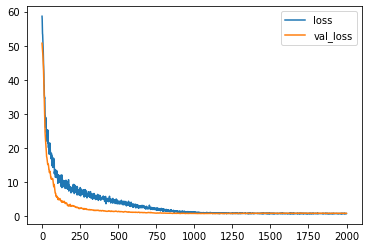

In [21]:
losses.plot()

In [22]:
y_pred = NNRegressor.predict(X_test)

In [23]:
np.mean(y_pred.ravel() - y_test)

0.05062283458131731